In [ ]:
#unzip the train folder
!unzip /content/updated_train.zip

In [2]:
#loading required libraries
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import pandas as pd
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import shutil
from tensorflow.keras.preprocessing import image

In [4]:
#Train dataset labels
train_labels = pd.read_csv("/content/train_labels.csv")

In [5]:
#Loading images using Keras from the directory
data = tf.keras.utils.image_dataset_from_directory("/content/updated_train",labels = "inferred",
                                                   label_mode="int",image_size=(32,32),                                                  
                                                   validation_split=0.2,subset="training",
                                                   seed=1234) 

Found 15264 files belonging to 2 classes.
Using 12212 files for training.


In [6]:
#Creating a validation data set
data_val = tf.keras.utils.image_dataset_from_directory("/content/updated_train",labels = "inferred",
                                                   label_mode="int",image_size=(32,32),                                                 
                                                   validation_split=0.2,subset="validation",
                                                   seed=1234)

Found 15264 files belonging to 2 classes.
Using 3052 files for validation.


In [7]:
print(data.class_names)

['0', '1']


In [8]:
#normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [9]:
#normalization of dataset
normalized_ds = data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

In [10]:
#Creating a CNN
num_classes = 2

model1 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [11]:
#Compile the model
model1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [12]:
#Fit the model
m = model1.fit(
  data,
  validation_data=data_val,
  epochs=30
)

Epoch 1/30
382/382 [==============================] - 30s 52ms/step - loss: 0.2889 - accuracy: 0.8954 - val_loss: 0.2318 - val_accuracy: 0.9024
Epoch 2/30
382/382 [==============================] - 20s 51ms/step - loss: 0.2302 - accuracy: 0.9138 - val_loss: 0.1947 - val_accuracy: 0.9305
Epoch 3/30
382/382 [==============================] - 20s 51ms/step - loss: 0.2007 - accuracy: 0.9293 - val_loss: 0.1724 - val_accuracy: 0.9391
Epoch 4/30
382/382 [==============================] - 20s 51ms/step - loss: 0.1747 - accuracy: 0.9368 - val_loss: 0.1558 - val_accuracy: 0.9479
Epoch 5/30
382/382 [==============================] - 20s 52ms/step - loss: 0.1663 - accuracy: 0.9391 - val_loss: 0.1437 - val_accuracy: 0.9518
Epoch 6/30
382/382 [==============================] - 20s 51ms/step - loss: 0.1526 - accuracy: 0.9453 - val_loss: 0.1382 - val_accuracy: 0.9571
Epoch 7/30
382/382 [==============================] - 20s 52ms/step - loss: 0.1445 - accuracy: 0.9475 - val_loss: 0.1385 - val_accuracy:

In [ ]:
#Loading test data
!unzip /content/test.zip
data_test = tf.keras.utils.image_dataset_from_directory("/content/test/test",labels = "inferred",
                                                   label_mode="int",image_size=(32,32),                                              
                                                   seed=1234,shuffle = False)

In [ ]:
#Making predictions on test data
pred = model1.predict(data_test)
pred

In [17]:
#getting the names of test data files
sample = pd.read_csv("/content/sample_submission.csv")

In [18]:
file_names_test = sorted(sample['File'])

In [19]:
df = pd.DataFrame(columns=['File', 'Label'])

In [22]:
#Labeling the test data files
for i in range(400):
  if pred[i][1] > 0:
    df = df.append({'File' : file_names_test[i], 'Label' : 1},ignore_index=True)
  else:
    df = df.append({'File' : file_names_test[i], 'Label' : 0},ignore_index=True)


In [24]:
#Saving the predictions to a csv file
df.to_csv("/content/result1",header=True,index=False)

In [25]:
#Using SVM for predictions
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [26]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[32, 32, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [27]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [28]:
#Fitting the SVM model
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])
r=cnn.fit(x = data, validation_data = data_val, epochs = 30)

Epoch 1/30
382/382 [==============================] - 20s 49ms/step - loss: 0.6492 - accuracy: 0.8974 - val_loss: 0.2314 - val_accuracy: 0.9115
Epoch 2/30
382/382 [==============================] - 19s 49ms/step - loss: 0.2325 - accuracy: 0.9169 - val_loss: 0.2556 - val_accuracy: 0.9092
Epoch 3/30
382/382 [==============================] - 19s 50ms/step - loss: 0.2051 - accuracy: 0.9242 - val_loss: 0.1888 - val_accuracy: 0.9266
Epoch 4/30
382/382 [==============================] - 19s 50ms/step - loss: 0.1912 - accuracy: 0.9271 - val_loss: 0.2031 - val_accuracy: 0.9168
Epoch 5/30
382/382 [==============================] - 19s 48ms/step - loss: 0.1668 - accuracy: 0.9349 - val_loss: 0.1902 - val_accuracy: 0.9246
Epoch 6/30
382/382 [==============================] - 19s 49ms/step - loss: 0.1701 - accuracy: 0.9358 - val_loss: 0.1686 - val_accuracy: 0.9387
Epoch 7/30
382/382 [==============================] - 19s 49ms/step - loss: 0.1538 - accuracy: 0.9410 - val_loss: 0.1792 - val_accuracy:

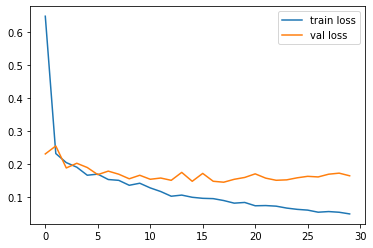

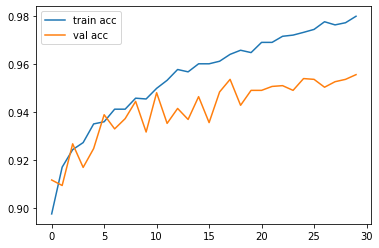

In [29]:
#Plot the loss function
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

#Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [30]:
#Making prediction on test data
pred_svm = cnn.predict(data_test)

In [31]:
df_svm = pd.DataFrame(columns=['File', 'Label'])

In [32]:
#Labeling the test dataset
for i in range(400):
  if pred_svm[i] > 0:
    df_svm = df_svm.append({'File' : file_names_test[i], 'Label' : 1},ignore_index=True)
  else:
    df_svm = df_svm.append({'File' : file_names_test[i], 'Label' : 0},ignore_index=True)

In [33]:
#Saving predictions as csv file. 
df_svm.to_csv("/content/result_svm",header=True,index=False)